## 使用"Word2vec"和"cosine_similarity"套件計算公司部門描述與Udemy課程描述之間的相似度並做匹配

### 1. 下載套件

In [1]:
import pandas as pd
import re
import jieba
from nltk.corpus import stopwords
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec

### 2.讀取和預處理數據

程式碼說明:

1. 這部分讀取了包含部門描述和角色數據的CSV文件，以及包含Udemy課程數據的Excel文件。
2. 設定課程數據框中的鏈接列名為'url'。

In [42]:
# import openai
# import pandas as pd
# from openai import OpenAI

# # 初始化 OpenAI 客户端
# api_key = 'sk-proj-WPlcWD0mNjksNLyAcIxQT3BlbkFJe6ECafBr1b8gnTgLuz9H'
# client = OpenAI(api_key=api_key)

# # 读取原始的 Excel 文件
# file_path = "C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/dcdata/ProData/departments_and_roles_en_da.xlsx"
# df = pd.read_excel(file_path)

# # 获取所需列的数据列表
# input_list = df[['Responsibilities', 'Employee Roles and Skills']].values.tolist()

# # 用于存储 Chat Response 的列表
# output = []

# for i in range(len(input_list)):
#     # 合并两列的数据作为输入
#     input_text = f"Responsibilities: {input_list[i][0]}\nEmployee Roles and Skills: {input_list[i][1]}"
    
#     response = client.chat.completions.create(
#         model='gpt-3.5-turbo',
#         messages=[
#             {'role': 'system', 'content': 'You are a professional AI assistant chatbot. Please try to use the data of department to respond with suitable skills or responsibilities.'},
#             {'role': 'user', 'content': str(input_text)},  # 确保输入为字符串
#         ]
#     )
   
#     chat_response = response.choices[0].message.content
#     output.append(chat_response)

# # 将 Chat Response 添加到原始 DataFrame 中作为新的一列
# df['Chat Response'] = output

# # 保存更新后的 DataFrame 到新文件
# new_file_path = "C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/dcdata/ProData/departments_and_roles_en_da_ai.xlsx"
# df.to_excel(new_file_path, index=False)

# print("翻译完成，文件已更新并保存至:", new_file_path)


翻译完成，文件已更新并保存至: C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/dcdata/ProData/departments_and_roles_en_da_ai.xlsx


In [40]:
# 读取部門和角色數據
departments_df = pd.read_excel("C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/dcdata/ProData/departments_and_roles_en_new_da.xlsx")

# 读取Udemy課程數據學習推薦系統專案
# courses_df = pd.read_excel('C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/dcdata/UdemyCourses_ai_related_3.xlsx')
courses_df = pd.read_excel('C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/dcdata/Udemy_ITAI 5.xlsx')



# 確認鏈接列名
link_column_name = 'url'
# link_column_name = '連結'

departments_df.head()
courses_df.head()


,title,url,price,headline,rating,duration,course_level,course_language
0,Artificial Intelligence A-Z 2024: Build 7 AI +...,https://www.udemy.com/course/artificial-intell...,"NT$1,690","Combine the power of Data Science, Machine Lea...",4.5,15 hours,Alls,English (US)
1,"Machine Learning A-Z: AI, Python & R + ChatGPT...",https://www.udemy.com/course/machinelearning/,"NT$2,090",Learn to create Machine Learning Algorithms in...,4.5,43 hours,Alls,English (US)
2,"Machine Learning, Data Science and Generative ...",https://www.udemy.com/course/data-science-and-...,"NT$2,090",Complete hands-on machine learning and GenAI t...,4.5,20.5 hours,Beginner,English (US)
3,TensorFlow for Deep Learning Bootcamp,https://www.udemy.com/course/tensorflow-develo...,"NT$2,090","Learn TensorFlow by Google. Become an AI, Mach...",4.6,63 hours,Alls,English (US)
4,"Complete A.I. & Machine Learning, Data Science...",https://www.udemy.com/course/complete-machine-...,"NT$1,890","Learn Data Science, Data Analysis, Machine Lea...",4.6,44 hours,Alls,English (US)


### 3.清理和分詞

程式碼說明:

1. 定義並應用文本清理函數來移除數字和標點，並轉換為小寫。
2. 合併數據框中的相關列以形成描述文本，然後清理文本。
3. 使用Jieba進行中文分詞，並移除停用詞。

In [41]:
# 定義文本清理函數
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text

# 合併部門和角色數據的相關列
# departments_df['combined_description'] = departments_df[['Department', 'Responsibilities', 'Employee Roles and Skills']].astype(str).agg(' '.join, axis=1)
# departments_df['combined_description'] = departments_df[['Department', 'summary']].astype(str).agg(' '.join, axis=1)
# departments_df['combined_description'] = departments_df[['Department', 'AI Description']].astype(str).agg(' '.join, axis=1)
departments_df['combined_description'] = departments_df[['Department', 'Department Description']].astype(str).agg(' '.join, axis=1)
# departments_df['combined_description'] = departments_df[['Department', 'test']].astype(str).agg(' '.join, axis=1)
courses_df['combined_description'] = courses_df[['title', 'headline']].astype(str).agg(' '.join, axis=1)
# courses_df['combined_description'] = courses_df[['課程名稱', '課程描述']].astype(str).agg(' '.join, axis=1)

# 清理文本
departments_df['cleaned_description'] = departments_df['combined_description'].apply(clean_text)
courses_df['cleaned_description'] = courses_df['combined_description'].apply(clean_text)

# 使用Jieba進行分詞
jieba.set_dictionary('dict.txt')
departments_df['tokens'] = departments_df['cleaned_description'].apply(lambda x: list(jieba.cut(x, cut_all=False)))
courses_df['tokens'] = courses_df['cleaned_description'].apply(lambda x: list(jieba.cut(x, cut_all=False)))

# 定義停用詞
stop_words = set(stopwords.words('english'))

# 定義移除停用詞和空格的函數
def remove_stopwords_and_spaces(tokens):
    filtered_tokens = [word for word in tokens if word not in stop_words and word.strip() != '']
    return filtered_tokens

# 移除停用詞和空格
departments_df['tokens'] = departments_df['tokens'].apply(remove_stopwords_and_spaces)
courses_df['tokens'] = courses_df['tokens'].apply(remove_stopwords_and_spaces)

# 只打印第229行的 'tokens' 列的內容
# print(courses_df.iloc[227]['tokens'])
# print(courses_df.iloc[1007]['tokens'])

# print(departments_df.iloc[2]['tokens'])

Building prefix dict from c:\Users\WCHuang8\Desktop\學習推薦系統專案\word2vec\最終版程式\dict.txt ...
Loading model from cache C:\Users\WCHuang8\AppData\Local\Temp\jieba.udab83c57cb5cfd731c2fa51719354029.cache
Loading model cost 0.582 seconds.
Prefix dict has been built successfully.


### 4.計算詞向量

程式碼說明:
1. 加載預訓練的Word2Vec模型。
2. 定義函數以計算每個文本的平均詞向量。
3. 為每個部門描述和課程描述生成向量表示。

In [42]:
# 加載你自己訓練好的Word2Vec模型
model = Word2Vec.load("C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/wiki-lemma-100D-phrase")

# 獲取向量表示
def get_word2vec_vector(tokens, model):
    vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(vecs) > 0:
        return np.mean(vecs, axis=0)
    else:
        return np.zeros(model.vector_size)

# 為每個部門描述生成向量表示
departments_df['vector'] = departments_df['tokens'].apply(lambda x: get_word2vec_vector(x, model))

# 為每個課程描述生成向量表示
courses_df['vector'] = courses_df['tokens'].apply(lambda x: get_word2vec_vector(x, model))

# print(courses_df.iloc[1007]['vector'])
print(departments_df.iloc[2]['vector'])

[-1.0720218  -1.7100838   1.984638    1.1066642  -0.4113132  -1.3969458
 -0.38472882  0.7077206  -0.5541247   2.2521505   1.5242205   0.28743926
  0.87900954  0.64267224  0.54084384  0.46586397 -0.08101459 -0.44709647
 -1.0318594   1.061346    0.39334527 -1.0611273  -0.03276107 -0.09287836
  0.6368806   0.34604794 -2.7790504   1.2585666  -0.5989977  -2.728503
 -1.3349744  -0.20770171 -1.13427     0.77794456 -1.692337   -1.2297529
 -2.686301    1.9592139  -0.82761973 -1.2007734  -2.0911875  -0.45550376
  1.5655534   3.007196   -0.35882398  0.11257074 -0.8871169   0.84571147
  0.6398821   0.81539553  0.4816259   3.7913814  -0.4260257   0.08526522
  1.7899983   0.89173347  1.166162   -0.19583537  1.6716235   0.12582676
 -2.3066497   0.9912133  -1.1288745  -0.33305192  1.0059816  -0.07092399
 -1.3871795   0.15574074  0.00760721  1.0681784   0.6858214  -0.23150077
 -0.5254227   0.98570395  0.6440713   0.6460411   0.37009636 -0.6298199
  0.1395356   0.59198207  0.4489342  -0.57557154  0.4366

### 5.計算相似度並找出配對，並儲存結果

程式碼說明:
1. 使用cosine_similarity函數計算部門描述和課程描述之間的相似度。
2. 找到每個部門描述與課程描述最相似的前五個配對。
3. 將配對結果保存到DataFrame中，並導出為Excel文件。

In [43]:
# 計算部門和課程描述的相似度
similarity_matrix = cosine_similarity(list(departments_df['vector']), list(courses_df['vector']))

# 找到每個部門描述與課程描述最相似的前五個配對
top_matches = []

for i in range(similarity_matrix.shape[0]):
    # top_indices = similarity_matrix[i].argsort()[-5:][::-1]
    top_indices = similarity_matrix[i].argsort()[-10:][::-1]
    for idx in top_indices:
        top_matches.append({
            'Department Description': departments_df.iloc[i]['Department'], 
            # 'Course Title': courses_df.iloc[idx]['課程名稱'], 
            # 'Course Description': courses_df.iloc[idx]['課程描述'], 
            'Course Title': courses_df.iloc[idx]['title'], 
            'Course Description': courses_df.iloc[idx]['headline'], 
            # '連結': courses_df.iloc[idx][link_column_name],
            'url': courses_df.iloc[idx]['url'],
            'Similarity': similarity_matrix[i][idx],
            'course_level': courses_df.iloc[idx]['course_level'],
            'rating': courses_df.iloc[idx]['rating'],
            'duration': courses_df.iloc[idx]['duration'],
            'course_language': courses_df.iloc[idx]['course_language']

        })

# 將配對結果轉換為 DataFrame
top_matches_df = pd.DataFrame(top_matches)

# 存成 Excel 文件
file_path = 'C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/TM_DAAI3.xlsx'





top_matches_df.to_excel(file_path, index=False)

print(f'Results saved to {file_path}')

Results saved to C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/TM_DAAI3.xlsx


In [39]:
# from sklearn.metrics.pairwise import cosine_similarity
# import pandas as pd

# # 計算部門和課程描述的相似度
# similarity_matrix = cosine_similarity(list(departments_df['vector']), list(courses_df['vector']))

# # 找到每個部門描述與課程描述最相似的前五個配對
# top_matches = []

# for i in range(similarity_matrix.shape[0]):
#     seen_courses = set()  # 用於追蹤已經添加的課程
#     top_indices = similarity_matrix[i].argsort()[::-1]  # 按照相似度排序
#     added_count = 0
    
#     for idx in top_indices:
#         course_title = courses_df.iloc[idx]['title']
#         course_url = courses_df.iloc[idx]['url']
        
#         if course_title not in seen_courses:  # 檢查課程是否已被添加
#             top_matches.append({
#                 'Department Description': departments_df.iloc[i]['Department'], 
#                 'Course Title': course_title, 
#                 'Course Description': courses_df.iloc[idx]['headline'], 
#                 '連結': course_url,
#                 'Similarity': similarity_matrix[i][idx],
#                 'course_level': courses_df.iloc[idx]['course_level'],
#                 'rating': courses_df.iloc[idx]['rating'],
#                 'duration': courses_df.iloc[idx]['duration'],
#                 'course_language': courses_df.iloc[idx]['course_language']
#             })
#             seen_courses.add(course_title)  # 添加課程到追蹤列表中
#             added_count += 1
        
#         if added_count == 5:  # 已經找到五個唯一的課程
#             break

# # 將配對結果轉換為 DataFrame
# top_matches_df = pd.DataFrame(top_matches)

# # 存成 Excel 文件
# file_path = 'C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/TM_DA3.xlsx'

# top_matches_df.to_excel(file_path, index=False)

# print(f'Results saved to {file_path}')


Results saved to C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/TM_DA3.xlsx


In [25]:
df = pd.read_excel('C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_TDA_AI3_2.xlsx')
df = df[['Department Description', 'Course Title', '連結', 'Course Description', 'Similarity', 'course_level']]
df['url'] = 'https://www.udemy.com' + df['連結']
df.to_excel('C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_TDA_AI3_2.xlsx', index=False)


print("完成")

完成


所有課程與部門的向量降維度投射圖(略過)

Results saved to C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_NFHR.xlsx


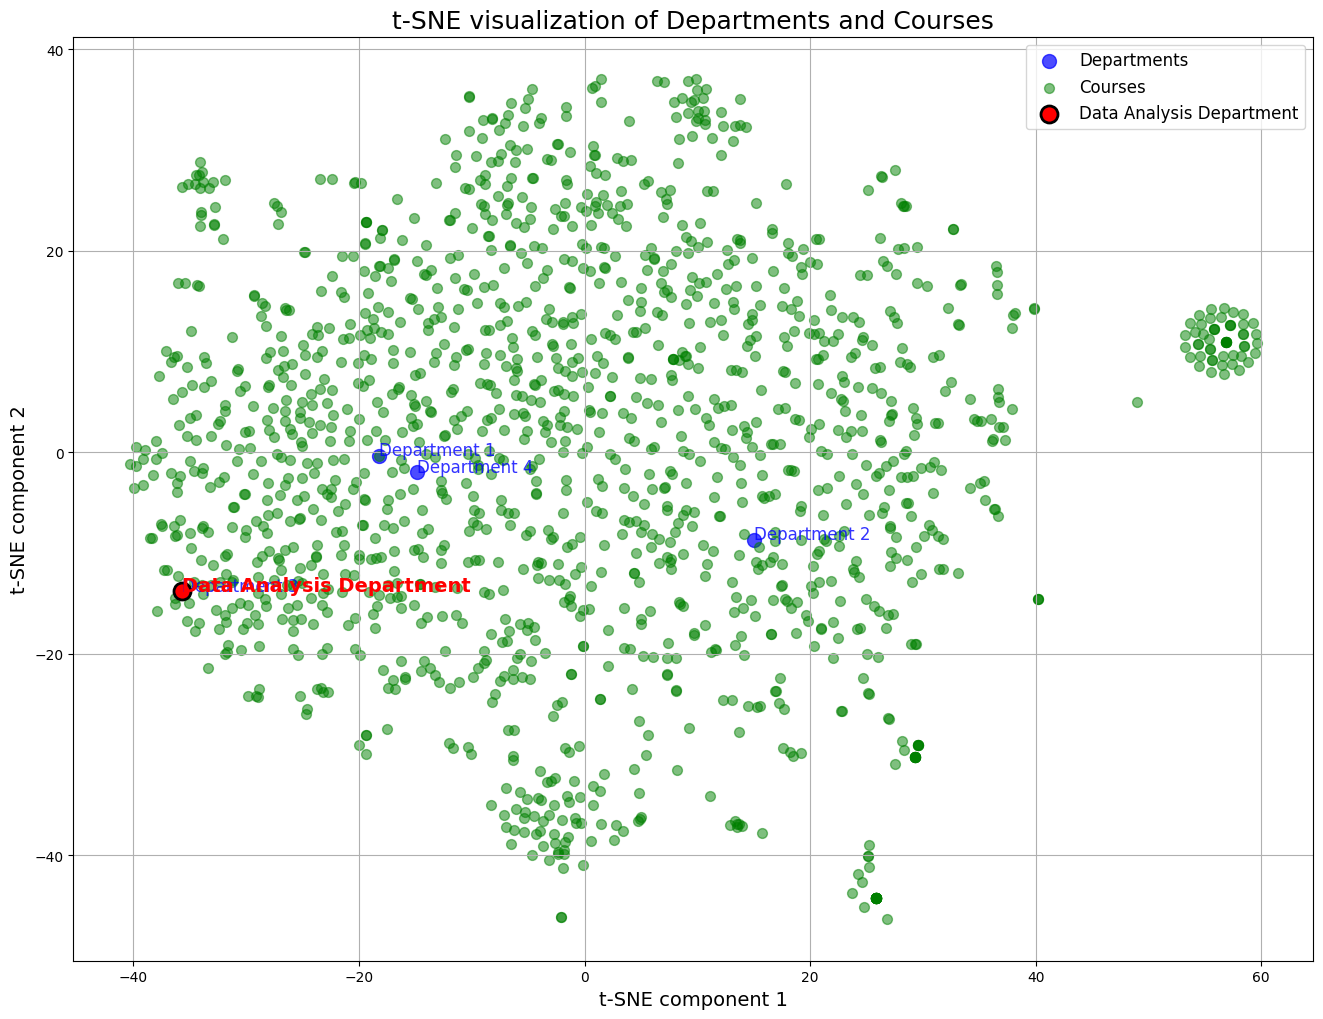

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# 假設 departments_df 和 courses_df 已經存在並且包含 'vector' 列

# 修改 Department 3 的名稱為 Data Analysis Department
departments_df.at[2, 'Department'] = 'Data Analysis Department'

# 計算部門和課程描述的相似度
similarity_matrix = cosine_similarity(list(departments_df['vector']), list(courses_df['vector']))

# 找到每個部門描述與課程描述最相似的前五個配對
top_matches = []

for i in range(similarity_matrix.shape[0]):
    top_indices = similarity_matrix[i].argsort()[-5:][::-1]
    for idx in top_indices:
        top_matches.append({
            'Department Description': departments_df.iloc[i]['Department'], 
            'Course Title': courses_df.iloc[idx]['title'], 
            'Course Description': courses_df.iloc[idx]['headline'], 
            '連結': courses_df.iloc[idx]['url'],
            'Similarity': similarity_matrix[i][idx]
        })

# 將配對結果轉換為 DataFrame
top_matches_df = pd.DataFrame(top_matches)

# 存成 Excel 文件
file_path = 'C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_NFHR.xlsx'
top_matches_df.to_excel(file_path, index=False)

print(f'Results saved to {file_path}')

# 繪製向量的t-SNE圖形表示
# 將部門和課程向量整合在一起
all_vectors = np.vstack((list(departments_df['vector']), list(courses_df['vector'])))
labels = ['Department ' + str(i+1) for i in range(len(departments_df))] + ['Course ' + str(i+1) for i in range(len(courses_df))]

# 使用t-SNE進行降維
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
all_vectors_2d = tsne.fit_transform(all_vectors)

# 獲取第1007堂課程的位置索引
course_1007_index = len(departments_df)+1009

# 獲取Data Analysis Department的位置索引
department_3_index = 2

# 繪製散點圖
plt.figure(figsize=(16, 12))

# 繪製部門的點
plt.scatter(all_vectors_2d[:len(departments_df), 0], all_vectors_2d[:len(departments_df), 1], 
            color='blue', label='Departments', s=100, alpha=0.7)
# 繪製課程的點
plt.scatter(all_vectors_2d[len(departments_df):, 0], all_vectors_2d[len(departments_df):, 1], 
            color='green', label='Courses', s=50, alpha=0.5)

# 突出顯示Data Analysis Department和第1007堂課程
plt.scatter(all_vectors_2d[department_3_index, 0], all_vectors_2d[department_3_index, 1], 
            color='red', label='Data Analysis Department', s=150, edgecolor='black', linewidth=2)
# plt.scatter(all_vectors_2d[course_1007_index, 0], all_vectors_2d[course_1007_index, 1], 
#             color='orange', label='Course 1007', s=150, edgecolor='black', linewidth=2)

# 只標註部門的標籤
for i, label in enumerate(labels[:len(departments_df)]):
    plt.annotate(label, (all_vectors_2d[i, 0], all_vectors_2d[i, 1]), fontsize=12, color='blue', alpha=0.8)

# 為突出顯示的點添加標籤
plt.annotate('Data Analysis Department', (all_vectors_2d[department_3_index, 0], all_vectors_2d[department_3_index, 1]), 
             fontsize=14, color='red', fontweight='bold')
# plt.annotate('Course 1007', (all_vectors_2d[course_1007_index, 0], all_vectors_2d[course_1007_index, 1]), 
#              fontsize=14, color='orange', fontweight='bold')

plt.xlabel('t-SNE component 1', fontsize=14)
plt.ylabel('t-SNE component 2', fontsize=14)
plt.title('t-SNE visualization of Departments and Courses', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Results saved to C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_NFHR.xlsx


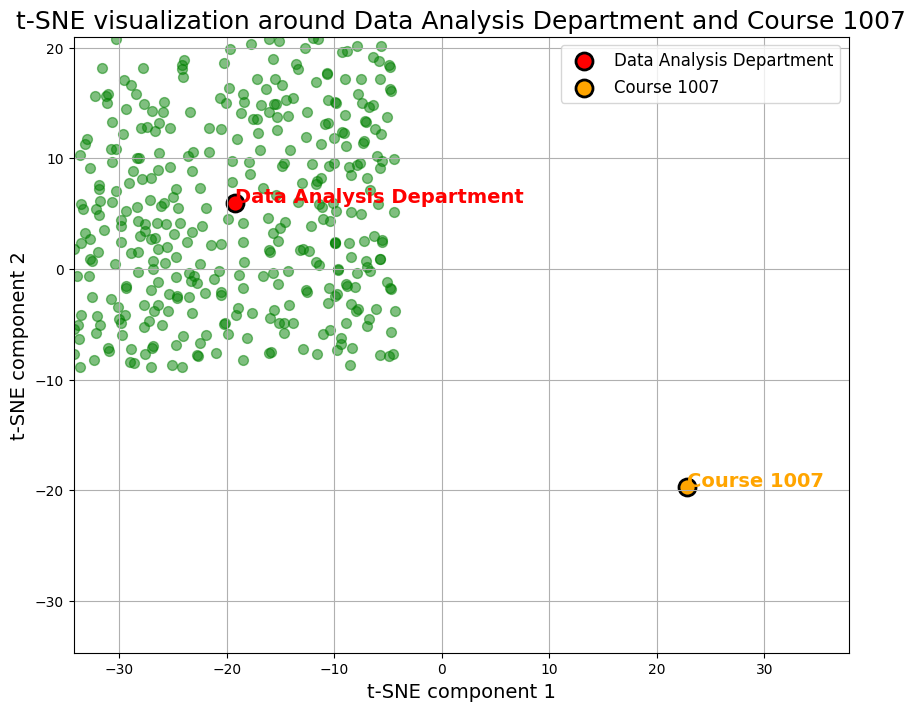

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# 假設 departments_df 和 courses_df 已經存在並且包含 'vector' 列

# 修改 Department 3 的名稱為 Data Analysis Department
departments_df.at[2, 'Department'] = 'Data Analysis Department'

# 計算部門和課程描述的相似度
similarity_matrix = cosine_similarity(list(departments_df['vector']), list(courses_df['vector']))

# 找到每個部門描述與課程描述最相似的前五個配對
top_matches = []

for i in range(similarity_matrix.shape[0]):
    top_indices = similarity_matrix[i].argsort()[-5:][::-1]
    for idx in top_indices:
        top_matches.append({
            'Department Description': departments_df.iloc[i]['Department'], 
            'Course Title': courses_df.iloc[idx]['title'], 
            'Course Description': courses_df.iloc[idx]['headline'], 
            '連結': courses_df.iloc[idx]['url'],
            'Similarity': similarity_matrix[i][idx]
        })

# 將配對結果轉換為 DataFrame
top_matches_df = pd.DataFrame(top_matches)

# 存成 Excel 文件
file_path = 'C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_NFHR.xlsx'
top_matches_df.to_excel(file_path, index=False)

print(f'Results saved to {file_path}')

# 繪製向量的t-SNE圖形表示
# 將部門和課程向量整合在一起
all_vectors = np.vstack((list(departments_df['vector']), list(courses_df['vector'])))
labels = ['Department ' + str(i+1) for i in range(len(departments_df))] + ['Course ' + str(i+1) for i in range(len(courses_df))]

# 使用t-SNE進行降維
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
all_vectors_2d = tsne.fit_transform(all_vectors)

# 獲取Data Analysis Department的位置索引
department_3_index = 2

# 獲取第1007堂課程的位置索引
course_1007_index = len(departments_df) + 1007

# 獲取Data Analysis Department和Course 1007的坐標
data_analysis_coords = all_vectors_2d[department_3_index]
course_1007_coords = all_vectors_2d[course_1007_index]

# 設定顯示範圍
x_range = 15  # x軸顯示範圍的一半
y_range = 15  # y軸顯示範圍的一半

# 繪製散點圖
plt.figure(figsize=(10, 8))

# 突出顯示Data Analysis Department
plt.scatter(data_analysis_coords[0], data_analysis_coords[1], 
            color='red', label='Data Analysis Department', s=150, edgecolor='black', linewidth=2)

# 突出顯示第1007堂課程
plt.scatter(course_1007_coords[0], course_1007_coords[1], 
            color='orange', label='Course 1007', s=150, edgecolor='black', linewidth=2)

# 繪製Data Analysis Department周圍的課程點
for i in range(len(departments_df), len(all_vectors_2d)):
    if (abs(all_vectors_2d[i, 0] - data_analysis_coords[0]) <= x_range) and (abs(all_vectors_2d[i, 1] - data_analysis_coords[1]) <= y_range):
        plt.scatter(all_vectors_2d[i, 0], all_vectors_2d[i, 1], color='green', s=50, alpha=0.5)

# 標註Data Analysis Department和Course 1007
plt.annotate('Data Analysis Department', (data_analysis_coords[0], data_analysis_coords[1]), 
             fontsize=14, color='red', fontweight='bold')
plt.annotate('Course 1007', (course_1007_coords[0], course_1007_coords[1]), 
             fontsize=14, color='orange', fontweight='bold')

# 設置顯示範圍，包含Data Analysis Department和Course 1007
x_min = min(data_analysis_coords[0] - x_range, course_1007_coords[0] - x_range)
x_max = max(data_analysis_coords[0] + x_range, course_1007_coords[0] + x_range)
y_min = min(data_analysis_coords[1] - y_range, course_1007_coords[1] - y_range)
y_max = max(data_analysis_coords[1] + y_range, course_1007_coords[1] + y_range)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel('t-SNE component 1', fontsize=14)
plt.ylabel('t-SNE component 2', fontsize=14)
plt.title('t-SNE visualization around Data Analysis Department and Course 1007', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


儲存詳細結果

In [68]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 定義一個函數來打印向量的前後幾個元素
def print_vector(vector, max_elements=5):
    if len(vector) > 2 * max_elements:
        return f"{vector[:max_elements]} ... {vector[-max_elements:]}"
    else:
        return str(vector)

# 計算部門和課程描述的相似度
similarity_matrix = cosine_similarity(list(departments_df['vector']), list(courses_df['vector']))

# 找到每個部門描述與課程描述最相似的前五個配對
top_matches = []

# 開啟一個文件來保存詳細信息
output_file = 'C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/similarity_details.txt'
with open(output_file, 'w') as f:
    for i in range(similarity_matrix.shape[0]):
        department_vector = departments_df.iloc[i]['vector']
        f.write(f"\nDepartment {i+1}: {departments_df.iloc[i]['Department']}\n")
        f.write(f"Department Vector: {department_vector}\n\n")

        print(f"\nDepartment {i+1}: {departments_df.iloc[i]['Department']}")
        print(f"Department Vector: {print_vector(department_vector)}\n")

        top_indices = similarity_matrix[i].argsort()[-5:][::-1]
        for rank, idx in enumerate(top_indices):
            course_vector = courses_df.iloc[idx]['vector']

            # 計算點積
            dot_product = np.dot(department_vector, course_vector)
            f.write(f"  Comparing with Course {idx+1}: {courses_df.iloc[idx]['title']}\n")
            f.write(f"  Course Vector: {course_vector}\n")
            f.write(f"  Dot Product: {dot_product:.4f}\n")

            # 計算模長
            department_norm = np.linalg.norm(department_vector)
            course_norm = np.linalg.norm(course_vector)
            f.write(f"  Department Vector Norm: {department_norm:.4f}\n")
            f.write(f"  Course Vector Norm: {course_norm:.4f}\n")

            # 計算余弦相似度
            similarity = dot_product / (department_norm * course_norm)
            f.write(f"  Cosine Similarity: {similarity:.4f}\n\n")

            print(f"  Comparing with Course {idx+1}: {courses_df.iloc[idx]['title']}")
            print(f"  Course Vector: {print_vector(course_vector)}")
            print(f"  Dot Product: {dot_product:.4f}")
            print(f"  Department Vector Norm: {department_norm:.4f}")
            print(f"  Course Vector Norm: {course_norm:.4f}")
            print(f"  Cosine Similarity: {similarity:.4f}\n")

            match_info = {
                'Department Description': departments_df.iloc[i]['Department'], 
                '課程': courses_df.iloc[idx]['title'], 
                '課程描述': courses_df.iloc[idx]['headline'], 
                '連結': courses_df.iloc[idx]['url'],
                'Similarity': similarity_matrix[i][idx]
            }
            top_matches.append(match_info)

# 將配對結果轉換為 DataFrame
top_matches_df = pd.DataFrame(top_matches)

# 存成 Excel 文件
file_path = 'C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_NFHR.xlsx'
top_matches_df.to_excel(file_path, index=False)

print(f'\nResults saved to {file_path}')
print(f'Details saved to {output_file}')



Department 1: Digital Platform Strategy and Promotion Department
Department Vector: [-0.56389576 -2.8435278   1.3690008   0.8627769  -1.129549  ] ... [-0.5986692   0.45901376 -3.159064   -2.1947405  -0.97000855]

  Comparing with Course 685: Data Science in Marketing: An Introduction Course 2022
  Course Vector: [-1.4382522  -1.7308668   2.3157904   1.0003757  -0.43228737] ... [-1.0065265  0.8206193 -2.1993735 -2.3562887 -1.2816244]
  Dot Product: 141.7183
  Department Vector Norm: 12.7154
  Course Vector Norm: 12.4290
  Cosine Similarity: 0.8967

  Comparing with Course 997: Bayesian Machine Learning in Python: A/B Testing
  Course Vector: [-1.2798389 -1.8447853  1.110673   0.613443  -1.0087656] ... [-0.16097936  1.1997811  -2.5104206  -2.3105772   0.14910157]
  Dot Product: 139.8716
  Department Vector Norm: 12.7154
  Course Vector Norm: 12.8382
  Cosine Similarity: 0.8568

  Comparing with Course 1355: Digital Twin
  Course Vector: [-0.07312062 -1.6633483   1.1883826   1.5357125  -

### 6.把結果翻譯成中文

In [45]:
import openai
import os
import pandas as pd
from openai import OpenAI

# 初始化 OpenAI 客戶端
api_key = 'sk-proj-WPlcWD0mNjksNLyAcIxQT3BlbkFJe6ECafBr1b8gnTgLuz9H'
client = OpenAI(api_key=api_key)

# 讀取原始的 Excel 文件
file_path = 'C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/TM_DAAI3.xlsx'
df = pd.read_excel(file_path)

# 從 Course Description 列中取得列表
input_list = df['Course Description'].tolist()

# 用來存儲 Chat Response 的列表
output = []

for i in range(len(input_list)):
    response = client.chat.completions.create(
        model='gpt-3.5-turbo',
        messages=[
            {'role': 'system', 'content': '你是很厲害的翻譯高手，會根據Course Description翻成繁體中文，並描述得像是要推薦別人課程，但要精簡，不能提到課程以外的內容，還要注意只能翻成台灣用語，不要翻成大陸用語'},
            {'role': 'user', 'content': input_list[i]},
        ]
    )
   
    chat_response = response.choices[0].message.content
    output.append(chat_response)

# 將 Chat Response 添加到原始 DataFrame 中作為新的一列
df['Course Description 中文'] = output

# 保存更新後的 DataFrame 到新文件
new_file_path = 'C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/TM_DAAI3.translated.xlsx'
df.to_excel(new_file_path, index=False)

print("翻譯完成，文件已更新並保存至:", new_file_path)


翻譯完成，文件已更新並保存至: C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/TM_DAAI3.translated.xlsx


連結處理

In [8]:
import pandas as pd

# 讀取Excel文件
file_path = "C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_TDA_AI3_translated.xlsx"
df = pd.read_excel(file_path)

# 假設“連結”欄的名稱是 'Link'
df['連結'] = df['連結'].apply(lambda x: f"https://www.udemy.com{x}" if not x.startswith("https://www.udemy.com") else x)

# 將結果保存回原始Excel文件或另存為新文件
output_file_path = "C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_TDA_AI3_translated.xlsx"
df.to_excel(output_file_path, index=False)

print(f"連結已更新並保存到 {output_file_path}")


連結已更新並保存到 C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_TDA_AI3_translated.xlsx


### 7.串接 Open AI api 處理課程描述，使其更精確

In [18]:
# import openai
# import os
# import pandas as pd
# from openai import OpenAI
 
# # 初始化 OpenAI 客戶端
# api_key = 'sk-proj-WPlcWD0mNjksNLyAcIxQT3BlbkFJe6ECafBr1b8gnTgLuz9H'
# client = OpenAI(api_key=api_key)

# # 讀取原始的 Excel 文件
# file_path = "C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_FDA_translated.xlsx"
# df = pd.read_excel(file_path)

# # 從 Course Description 列中取得列表
# input_list = df['Course Description 中文'].tolist()

# # 用來存儲 Chat Response 的列表
# output = []

 
# for i in range(len(input_list)):
#     response = client.chat.completions.create(
#         model='gpt-3.5-turbo',
#         messages=[
#             # {'role': 'system', 'content': '你是很厲害的課程描述高手，會根據得到的檔案的"Course Description 中文"重新做繁體精簡的描述'},
#             {'role': 'system', 'content': 'You are a professional AI assistant chatbot. Please simplify the following course description in Traditional Chinese by rewriting it into one sentence in a conversational style. '},
#             {'role': 'user', 'content': input_list[i]},
#         ]
#     )
   
#     chat_response = response.choices[0].message.content
#     output.append(chat_response)

# # 將 Chat Response 添加到原始 DataFrame 中作為新的一列
# df['Chat Response'] = output

# # 將更新後的 DataFrame 保存回 Excel 文件
# df.to_excel(file_path, index=False)

# print("翻譯完成，文件已更新並保存至:", file_path)

翻譯完成，文件已更新並保存至: C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_FDA_translated.xlsx


In [35]:
import openai
import os
import pandas as pd
from openai import OpenAI

# 初始化 OpenAI 客戶端
api_key = 'sk-proj-WPlcWD0mNjksNLyAcIxQT3BlbkFJe6ECafBr1b8gnTgLuz9H'
client = OpenAI(api_key=api_key)

# 讀取原始的 Excel 文件
file_path = "C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_FDA_translated.xlsx"
df = pd.read_excel(file_path)

# 從 Course Description 列中取得列表
input_list = df['Course Description 中文'].tolist()

# 用來存儲 Chat Response 的列表
output = []

for i in range(len(input_list)):
    response = client.chat.completions.create(
        model='gpt-3.5-turbo',
        messages=[
            {'role': 'system', 'content': 'You are a professional AI assistant chatbot. Please simplify the following course description in Traditional Chinese by rewriting it into one sentence in a conversational style.'},
            {'role': 'user', 'content': input_list[i]},
        ]
    )
   
    chat_response = response.choices[0].message.content
    output.append(chat_response)

# 將 Chat Response 添加到原始 DataFrame 中作為新的一列
df['Chat Response'] = output

# 保存更新後的 DataFrame 到新文件
new_file_path = "C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_FDA_translated_updated.xlsx"
df.to_excel(new_file_path, index=False)

print("翻譯完成，文件已更新並保存至:", new_file_path)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_FDA_translated.xlsx'

In [ ]:
from openai import OpenAI
# import pandas as pd

# # 記得key不要洩漏出去
# api_key = 'sk-proj-Hi5UiE1Kdc9ziQWI3PvMT3BlbkFJcHljeUPgMbv8KwBY4Sqq'
# client = OpenAI(api_key=api_key)

# # 讀取 Excel 文件
# file_path = 'C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/output/top_matches_FHR.xlsx'
# df = pd.read_excel(file_path)

# # 假設 Excel 裡面的 'Course Description' 欄位是我們想要的內容
# course_description = df['Course Description'].tolist()

# # 我們假設你想逐一將每個 Course Description 發送給模型
# for description in course_description:
#     completion = client.chat.completions.create(
#       model="gpt-3.5-turbo",
#       messages=[
#         {"role": "assistant", "content": "你是一個專業的AI教學顧問，請根據問題使用繁體中文回覆"},
#         {"role": "user", "content": description}
#       ]
#     )
    
#     # 印出結果
#     print(completion.choices[0].message['content'])


模型的降維度向量投射圖

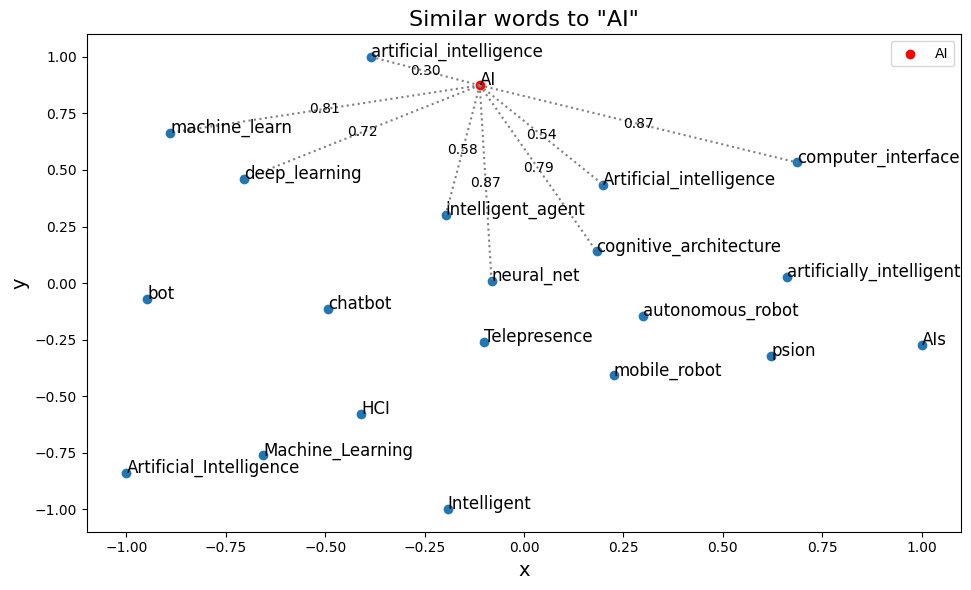

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from gensim.models import Word2Vec

# 使用已載入的模型
model = Word2Vec.load("C:/Users/WCHuang8/Desktop/學習推薦系統專案/word2vec/wiki-lemma-100D-phrase")

input_word = 'AI' # 修改為英文詞

# 確保輸入詞在模型的詞彙表中
if input_word not in model.wv:
    raise ValueError(f"The word '{input_word}' is not in the vocabulary.")

# 輸入詞的相似詞及向量資訊
similar_words = model.wv.most_similar(input_word, topn=20)
similar_words, scores = zip(*similar_words)
similar_vectors = [model.wv[x] for x in similar_words]

# 將「輸入詞」與「相似詞」總和在一起, 統一進行以下的降維, 並將「輸入詞」擺放於第一位以利識別
words = [input_word] + list(similar_words)
input_vector = model.wv[input_word]
vectors = np.vstack(([input_vector], similar_vectors))

# 使用 t-SNE 降維
tsne = TSNE(n_components=2, perplexity=10, random_state=0)
vectors_2d = tsne.fit_transform(vectors)

# 縮放向量值到範圍 [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
vectors_2d = scaler.fit_transform(vectors_2d)

# 繪製散點圖
plt.figure(figsize=(10, 6))

# 繪製輸入詞本身的點
plt.scatter(vectors_2d[0, 0], vectors_2d[0, 1], color='red', label=input_word)
# 將輸入詞標籤添加到對應的點上
plt.annotate(input_word, xy=(vectors_2d[0, 0], vectors_2d[0, 1]), fontsize=12)

# 繪製相似詞的點
plt.scatter(vectors_2d[1:, 0], vectors_2d[1:, 1])

# 將相似詞標籤添加到對應的點上
for i, x in enumerate(similar_words):
    plt.annotate(x, xy=(vectors_2d[i + 1, 0], vectors_2d[i + 1, 1]), fontsize=12)

threshold = 1.0

# 繪製連線
for i in range(1, len(vectors_2d)):
    distance = np.linalg.norm(vectors_2d[0, :] - vectors_2d[i, :])
    if distance <= threshold:
        plt.plot([vectors_2d[0, 0], vectors_2d[i, 0]], [vectors_2d[0, 1], vectors_2d[i, 1]], color='gray', linestyle='dotted')
        midpoint = (vectors_2d[0, :] + vectors_2d[i, :]) / 2
        plt.annotate(f'{distance:.2f}', xy=midpoint, ha='center', va='center', fontsize=10)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title(f'Similar words to "{input_word}"', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()
